# Trabalho de Sistemas Hidropneuméticos 

Tema: Dimensionamento e automatização de um circuito hidráulico

---

Alunos: Abner Vieira Pereira (1923495GMEC) e Felipe de Almeida Rosa (2022706GMEC)

In [17]:
from numpy import *
import numpy as np
from IPython.display import Video, Image

# 1.0 Introdução ao circuito

O circuito proposto neste trabalho foi representado no <i>software</i> fluidsim, conforme a figura abaixo:

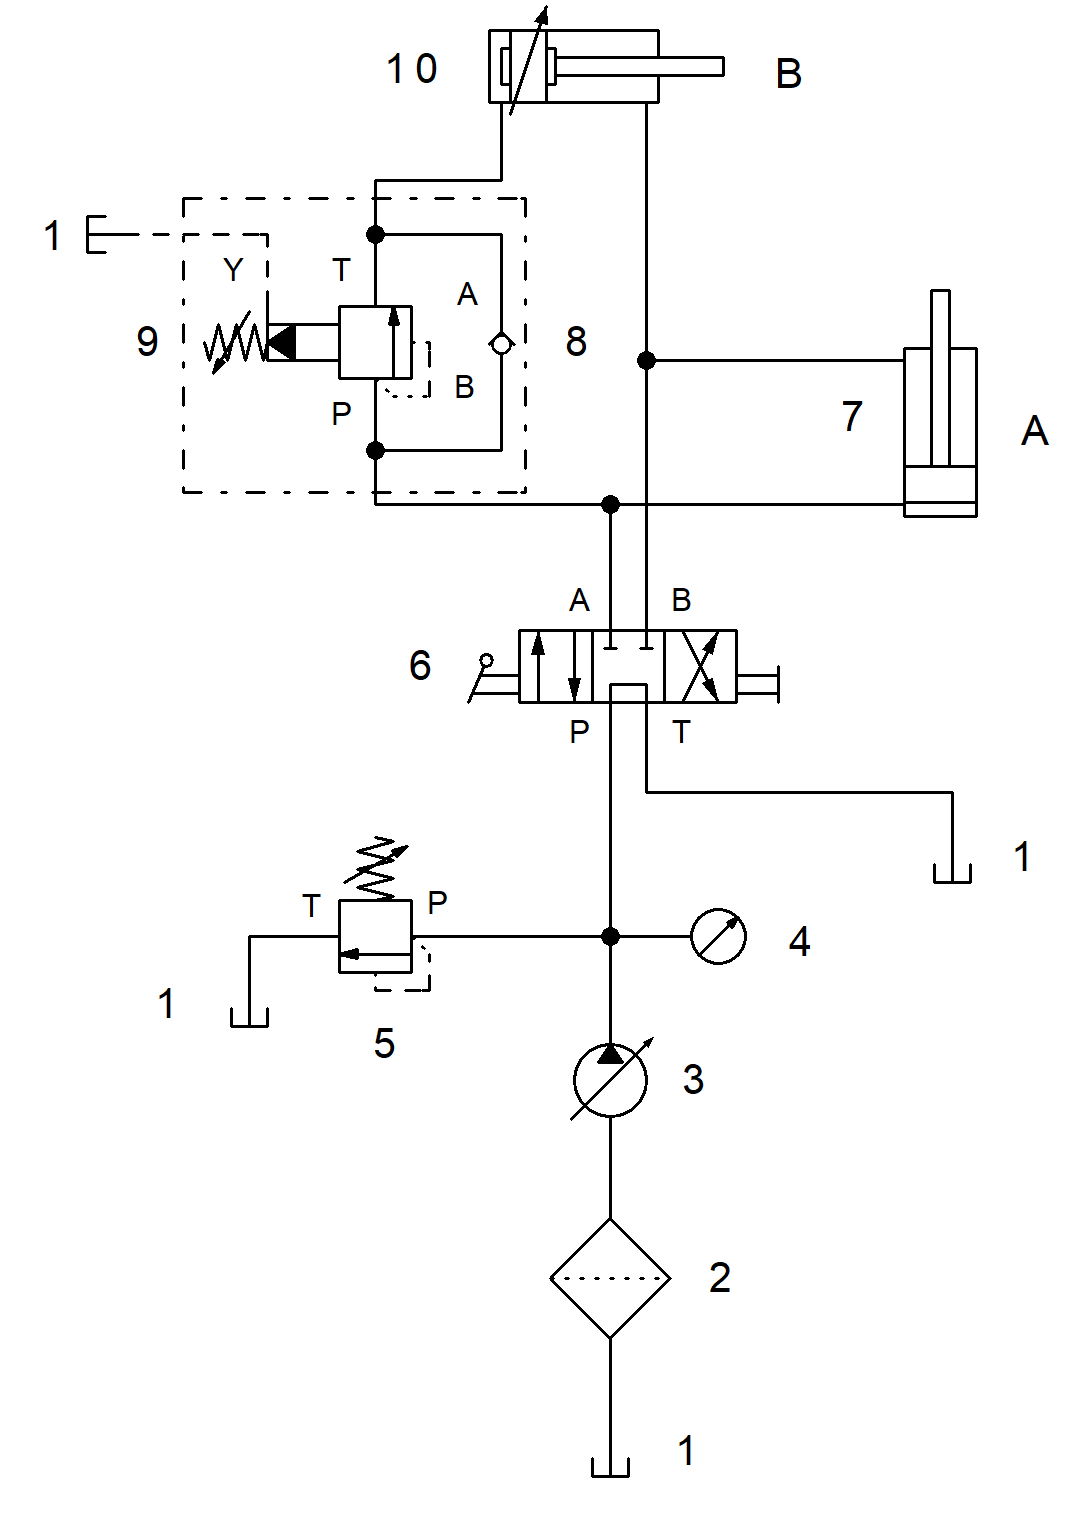

In [18]:
Image('circuito_proposto.png', width=500)

## 1.1 Componentes do circuito

**1. Tanques ou reservatórios**

**2. Filtro**

**3. Bomba de deslocamento variável**

**4. Manômetro**

**5. Válvula reguladora de pressão simples**

**6. Válvula de controle direcional ou "distribuidora"**

**7. Pistão de dupla ação (Pistão A)**

**8. Válvula de retenção**

**9. Válvula de alívio de pressão com controle piloto**

**10. Pistão de dupla ação com absorvedor de choque (Pistão B)**


## 1.2 Funcionamento do circuito

In [19]:
Video('circ_prop.m4v',width=700)

A sequência dos eventos que esse circuito executa foi verificada através de uma simulação conduzida no <i>software</i> FluidSIM-H. Dessa forma, observou-se que ao acionar a alavanca da válvula de controle direcional, o avanço do pistão A. Quando o pistão A atingiu o final de seu curso, iniciou-se o avanço do pistão B. Ao pressionar o comando de retorno, ambos os pistões retornam simultaneamente à posição inicial.

# 2.0 Desenvolvimento do dimensionamento

Para o dimensionamento dos diâmetros comerciais do cílindro e da haste dos pistões A e B, desenvolveu-se uma classe com funções que representam as fórmulas necessárias para esse processo:

In [20]:
class Dim_Pistão():
    def __init__(self, P_tb, eta_c, F_a, F_r, l, S, E):
        self.P_tb = P_tb     # Armazena o valor da pressão de trabalho em bar
        self.eta_c = eta_c   # Armazena o valor da eficiência do sistema
        self.F_a = F_a       # Armazena o valor da força de avanço em kN
        self.F_r = F_r       # Armazena o valor da força de retorno em kN
        self.l = l           # Armaz0ena o valor do comprimento da haste em cm
        self.S = S           # Armazena o valor do fator de segurança
        self.E = E           # Armazena o módullo de Young em GPa
        
        
    def bar_2_Pa(self):
        # Função que converte o valor da pressão em bar para MPa.
        P_tb = self.P_tb * 100000
        
        global P_gb
        P_gb =  P_tb
        
        return P_tb
    
    def kN_2_N(self):
        # Função que converte a unidade de força de N para kN
        F_a = self.F_a * 1000
        F_r = self.F_r * 1000
        
        global F_ag
        F_ag = F_a
    
        global F_rg
        F_rg = F_r
        
        return F_a
    
    def D_pistão(self):
        # Função que calcula o diâmetro do pistão em m
        d_p = np.sqrt((4 * F_ag) / (self.eta_c * P_gb * np.pi))
        
        global d_pg
        d_pg = d_p
        
        return d_p      
    
    def D_haste(self):
        # Função que calcula o diâmetro da haste em m
        d_h = np.sqrt((d_pg**2) - ((4 * F_rg) / (self.eta_c * P_gb * np.pi)))
        
        global d_hg 
        d_hg = d_h
        
        return d_h
    
    def cm_2_m(self):
        # FUnção que converte de cm para m
        l = self.l * 0.01
        
        global l_g
        l_g = l
        
        return l
    
    def GPa_2_Pa(self):
        # FUnção que converte de GPa para Pa
        E = self.E * (10**9)
        
        global E_g
        E_g = E
        
        return E
    
    def Comp_Flam(self):
        # Função que pergunta ao usuário qual é o caso comprimento livre de flambagem 
        while True:
            resp = int(input("Escolha o caso da carga de Euller:\n Caso 1: Uma extremidade livre e a outra fixa \n Caso 2: As duas extremidades articuladas \n Caso 3: Uma extremidade articulada e a outra fixa \n Caso 4: As duas extremidades fixas \n Escolha: "))

            if resp == 1:
                lambda_1 = 2 * l_g
                break
                
            elif resp == 2:
                lambda_1 = l_g
                break
                
            elif resp == 3:
                lambda_1 = l_g * (0.5**0.5)
                break
                
            elif resp == 4:
                lambda_1 = l_g/2 
                break
            else:
                print("Oops, você digitou uma tecla diferente de 1,2,3 e 4. Tente novamente!")
                
        
        global lambda_1g
        lambda_1g = lambda_1
        
        return print(f'Comprimento livre de flambagem igual {lambda_1} m.')
            
    
    def D_Crítico(self):
        # Função que calcula o comprimento crítico da haste segundo o critério de flambagem de Euller
        d_hc = ((64 * (lambda_1g**2) * F_ag * self.S) / ((np.pi**3) * E_g))**(1/4)
        
        global d_hcg
        d_hcg = d_hc
        
        return d_hc
    
    def Verifica_Flambagem(self):
        if d_hcg > d_hg:
            print(f'Como o d_crítico = {d_hcg:.4f} mm é maior que d_haste = {d_hg:.4f} mm, a haste sofre flambagem !')
        else:
            print(f'Como o d_crítico = {d_hcg:.4f} mm é menor que d_haste = {d_hg:.4f} mm, a haste não sofre flambagem !')

## 2.1.1 Dimensionamento do Pistão A

O código acima se refere à criação do objeto chamado "Pistão_A", o qual foi atribuído Pressão de Trabalho igual a 150 Bar, eficiência de 95%, Força de Acionamento 30 kN, Força de Retorno de 15 kN, comprimento de 10 cm, Fator de Seguraça de 4 e Módulo de Young de 210 GPa, visto que o material é aço. 

In [21]:
Pistão_A = Dim_Pistão(150,0.95,30,15,10,4,210)

In [22]:
Pistão_A.bar_2_Pa()

15000000

In [23]:
Pistão_A.kN_2_N()

30000

O diâmetro do pistão é calculado segundo a fórmula:

\begin{equation}
    D_p = \sqrt{\dfrac{4F_a}{\eta_c P \pi}}
\end{equation}

In [24]:
print(f'O diâmetro teórico do cilindro do pistão A vale {(Pistão_A.D_pistão()*1000):.2f} mm.')

O diâmetro teórico do cilindro do pistão A vale 51.77 mm.


Já o diâmetro da haste pode ser calculado por:
\begin{equation}
    D_h = \sqrt{D_p^2  - \dfrac{4F_r}{\eta_c P \pi}}
\end{equation}


In [25]:
print(f'O diâmetro teórico da haste do pistão A vale {(Pistão_A.D_haste()*1000):.2f} mm.')

O diâmetro teórico da haste do pistão A vale 36.61 mm.


In [26]:
Pistão_A.cm_2_m()

0.1

In [27]:
Pistão_A.GPa_2_Pa()

210000000000

In [28]:
Pistão_A.Comp_Flam()

Comprimento livre de flambagem igual 0.1 m.


O diâmetro crítico de Euller pode ser calculado por:

\begin{equation}
    D_{hc} = \sqrt[4]{\dfrac{64S\lambda^2F_a}{\pi^2 E}}
\end{equation}

In [29]:
print(f'O diâmetro crítico da haste segundo o critério de flambagem de Euller é igual a {(Pistão_A.D_Crítico()*1000):.2f} mm.')

O diâmetro crítico da haste segundo o critério de flambagem de Euller é igual a 10.42 mm.


In [30]:
Pistão_A.Verifica_Flambagem()

Como o d_crítico = 0.0104 mm é menor que d_haste = 0.0366 mm, a haste não sofre flambagem !


## 2.1.2 Valores Comerciais Pistão A

Os valores comerciais para os diâmetros do cilíndro e da haste dos pistões foram determinados tendo em perspectiva o catálogo de um conceituado fabricante, a REXROTH, que foi encontrado no livro "Automação Hidráulica: Projeto, Dimensionamento e Análise de Circuitos", do engenheiro Arivelto Bustamante Fialho.

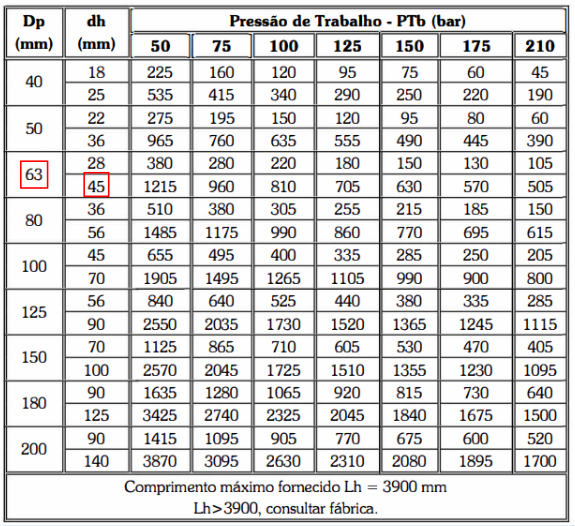

In [31]:
Image('Ds_comerciais_PA-1.png',width=500)

Tendo em vista que os valores dos diâmetros do cilíndro e da haste foram, respectivamente, iguais a 51,77 mm e 36,61 mm, os valores comerciais a serem utilizados correspondem à 63 mm (cilíndro) e 45 mm (haste).

Abaixo, segue um exemplo de como ficaria um arranjo real desse pistão caso fosse fabricado segundo o modelo da B.d.hydraulic India encontrado na [Indiamart](https://www.indiamart.com/proddetail/5-ton-hydraulic-cylinder-22820928462.html):

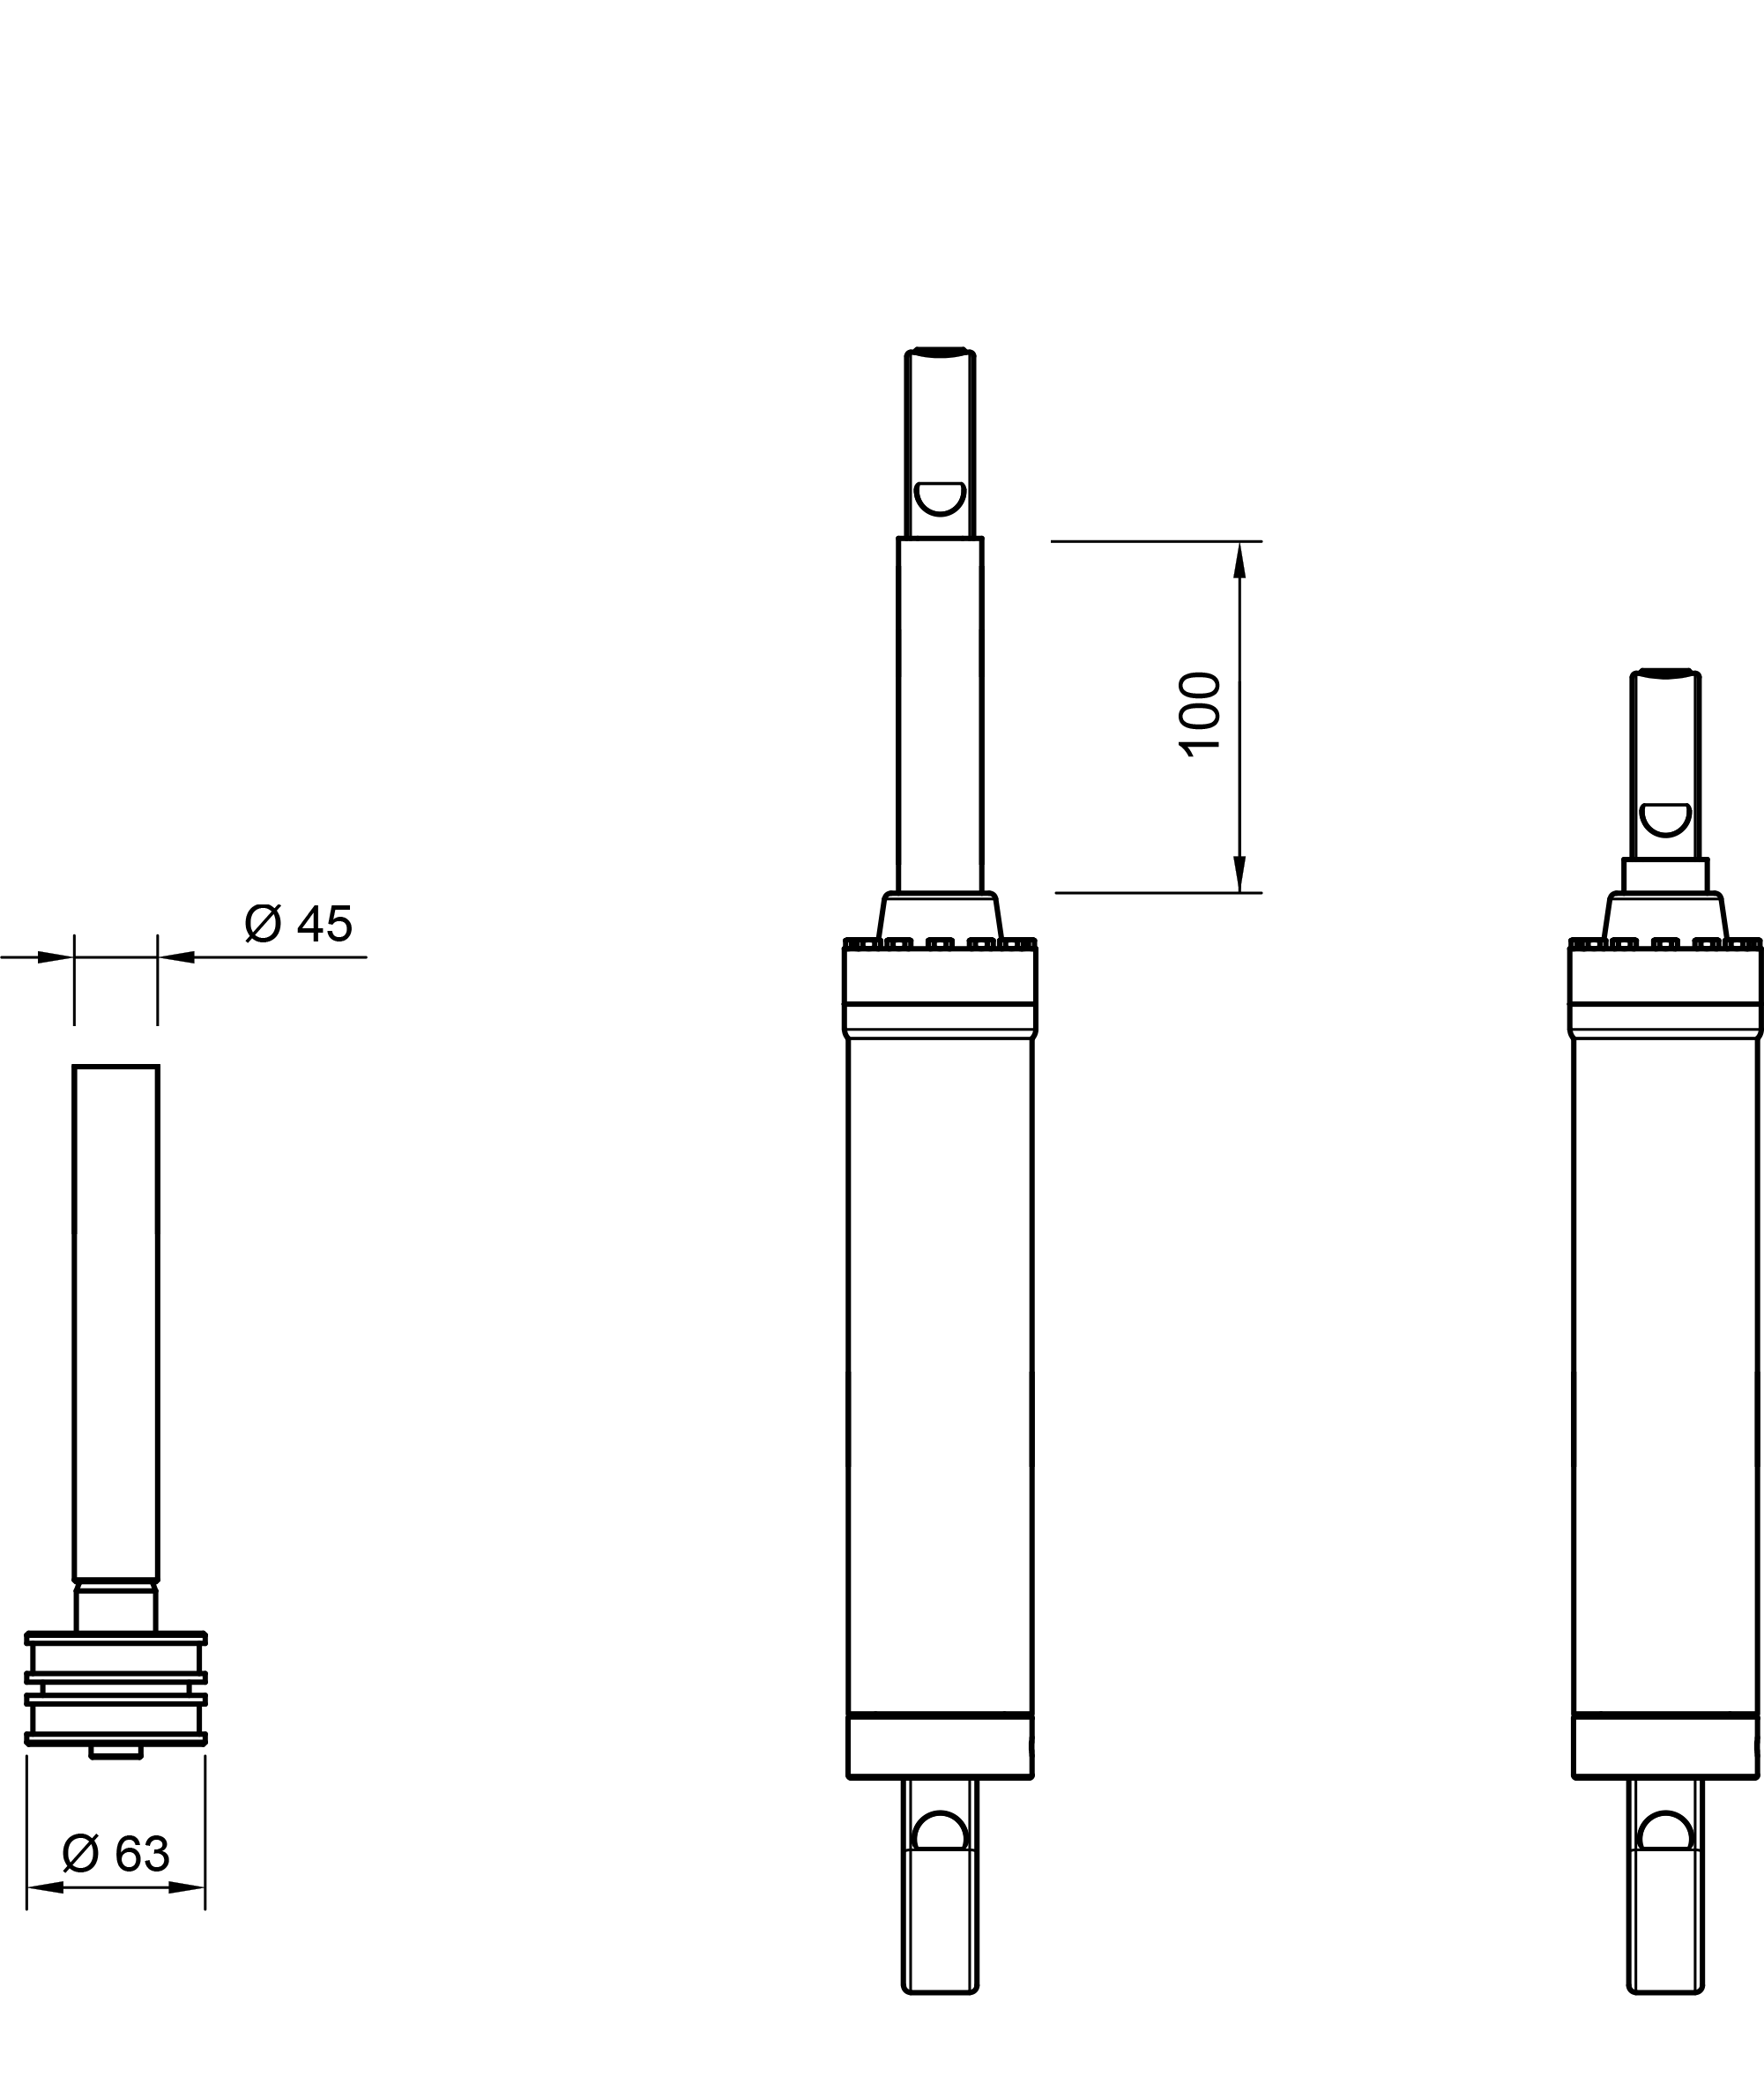

In [56]:
Image("Prancha_A.png", width=500)

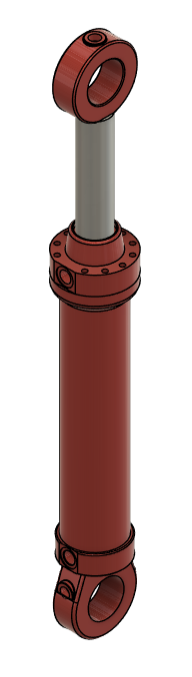

In [58]:
Image("Vista 2_A.png")

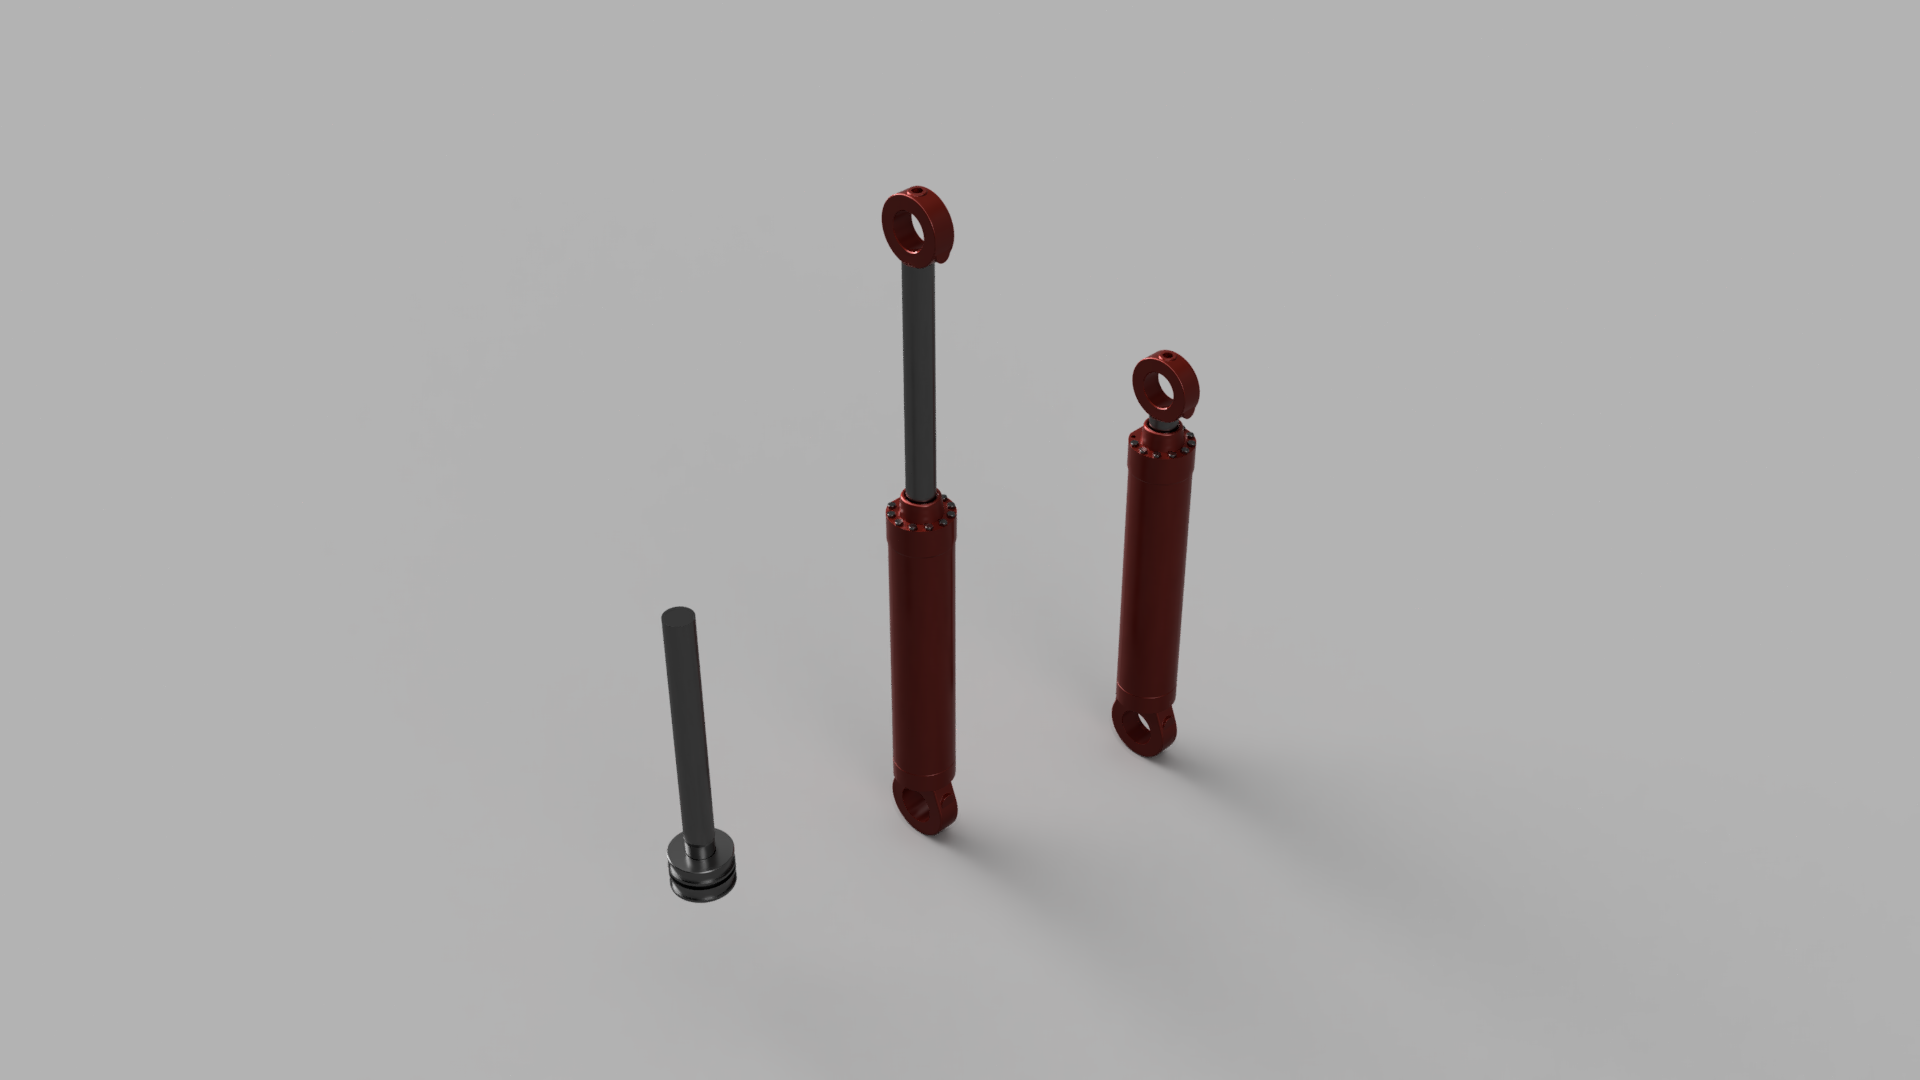

In [65]:
Image("Vista 3_A.png",width=700)

## 2.2.1 Dimensionamento do Pistão B

In [32]:
Pistão_B = Dim_Pistão(150,0.95,10,6,20,4,210)

O código acima se refere à criação do objeto chamado "Pistão_B", o qual foi atribuído Pressão de Trabalho igual a 150 Bar, eficiência de 0,95, Força de Acionamento 10 kN, Força de Retorno de 6 kN, comprimento de 20 cm, Fator de Seguraça de 4 e Módulo de Young de 210 GPa, visto que o material é aço. 

In [33]:
Pistão_B.bar_2_Pa()

15000000

In [34]:
Pistão_B.kN_2_N()

10000

In [35]:
print(f'O diâmetro teórico do cilindro do pistão B vale {(Pistão_B.D_pistão()*1000):.2f} mm.')

O diâmetro teórico do cilindro do pistão B vale 29.89 mm.


In [36]:
print(f'O diâmetro teórico da haste do pistão B vale {(Pistão_B.D_haste()*1000):.2f} mm.')

O diâmetro teórico da haste do pistão B vale 18.91 mm.


In [37]:
Pistão_B.cm_2_m()

0.2

In [38]:
Pistão_B.GPa_2_Pa()

210000000000

In [39]:
Pistão_B.Comp_Flam()

Comprimento livre de flambagem igual 0.2 m.


In [40]:
print(f'O diâmetro crítico da haste segundo o critério de flambagem de Euller é igual a {(Pistão_A.D_Crítico()*1000):.2f} mm.')

O diâmetro crítico da haste segundo o critério de flambagem de Euller é igual a 11.20 mm.


In [41]:
Pistão_B.Verifica_Flambagem()

Como o d_crítico = 0.0112 mm é menor que d_haste = 0.0189 mm, a haste não sofre flambagem !


## 2.2.2 Valores Comerciais Pistão B

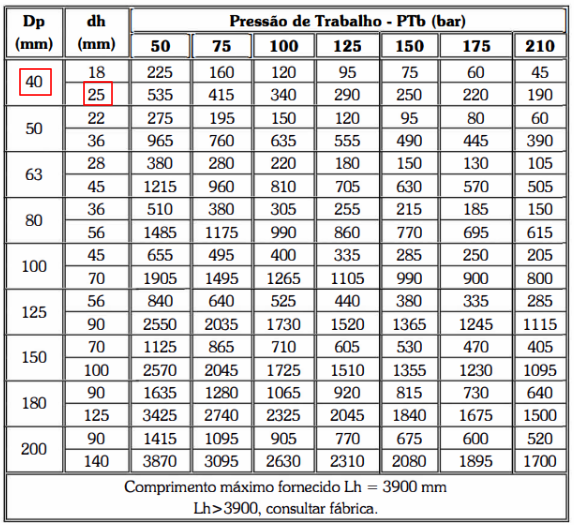

In [42]:
Image('Ds_comerciais_PB-1.png',width=500)

Utilizando o mesmo catálogo de  2.1.2, tem-se que os diâmetros comerciais para o cilíndro e a haste do pistão B são, respecitvamente, iguais a 40 mm e 25 mm, uma vez que os valores teóricos encontrados foram D_p = 29,89 mm e D_h = 18,91 mm.

Abaixo, segue um exemplo de como ficaria um arranjo real desse pistão caso fosse fabricado segundo o modelo da B.d.hydraulic India encontrado na [Indiamart](https://www.indiamart.com/proddetail/5-ton-hydraulic-cylinder-22820928462.html):

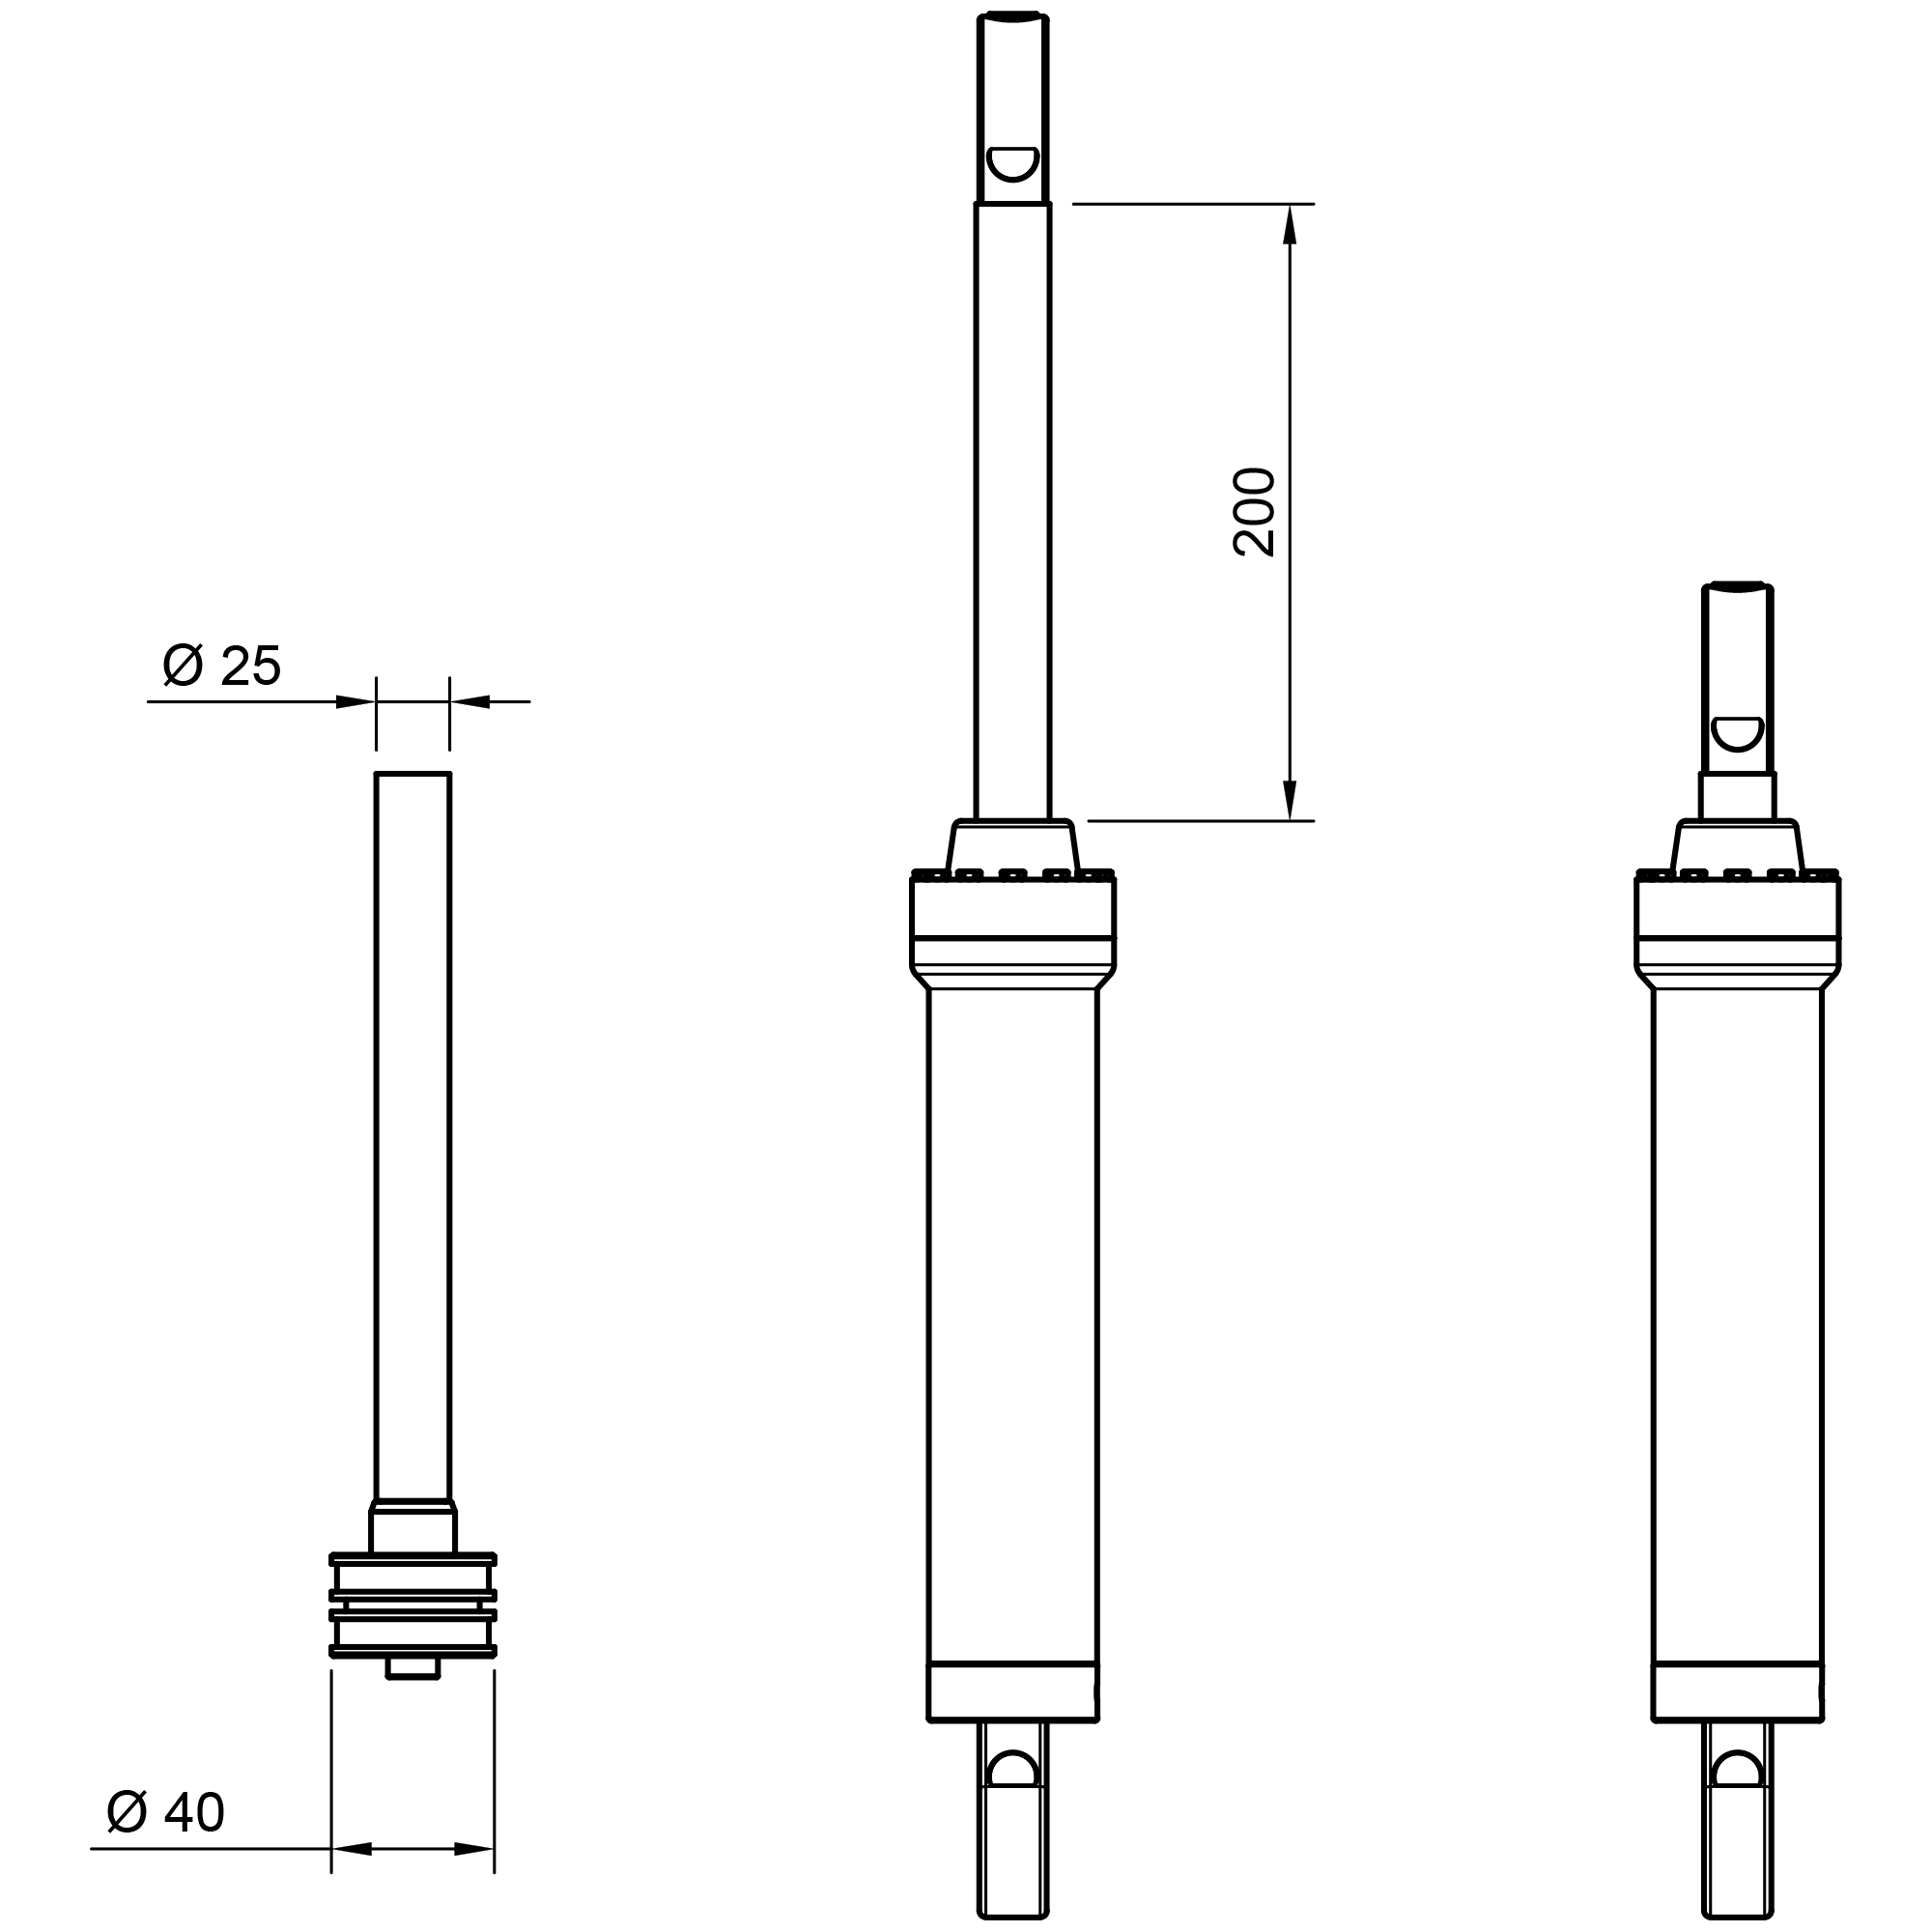

In [62]:
Image("Prancha_B.png",width=500)

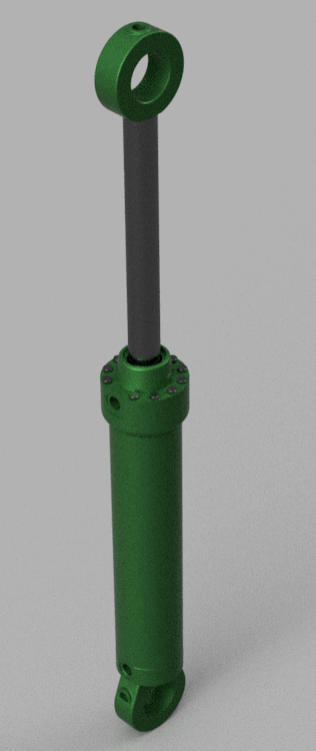

In [60]:
Image("Vista 2_B.png")

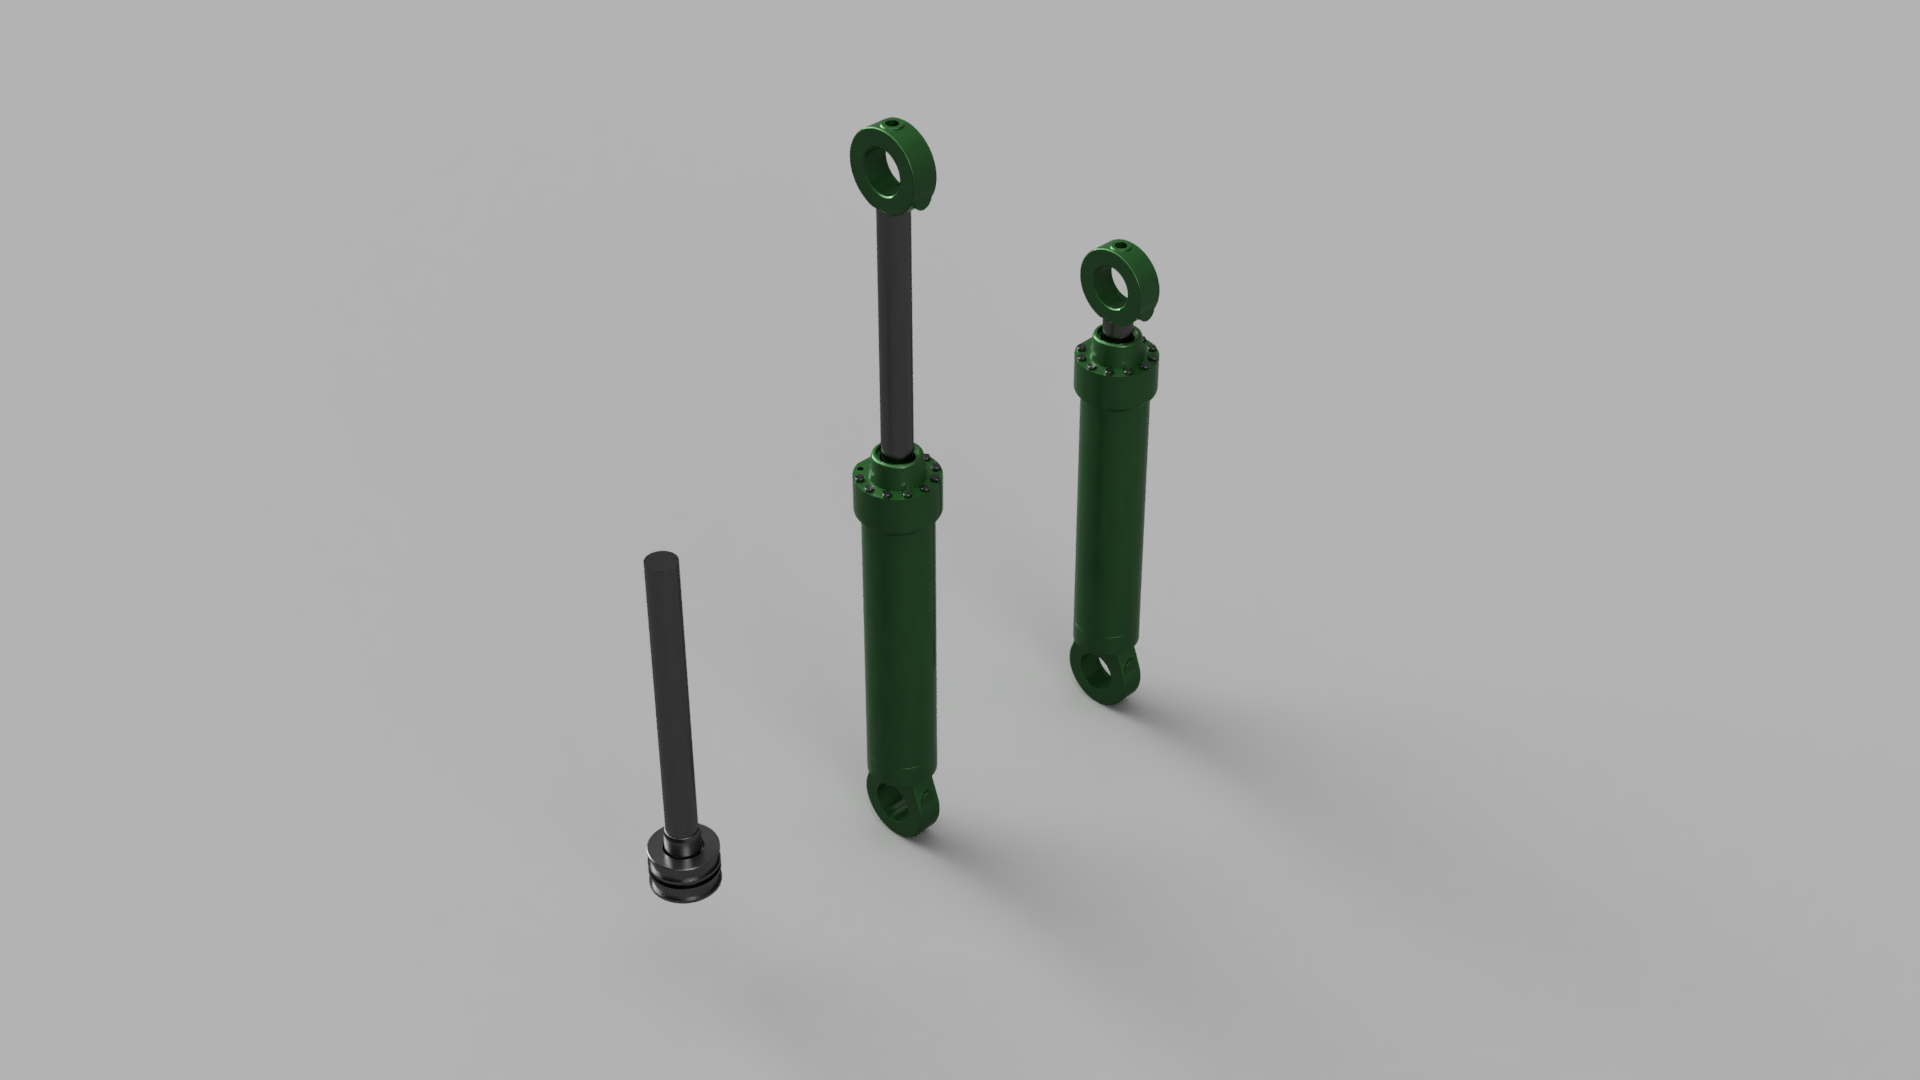

In [66]:
Image("Vista 3_B.png",width=700)

## 2.3 Resumo do dimensionamento

| Pistão | Diâmetro teórico cilíndro | Diâmetro teórico haste | Diâmetro crítico da haste| Diâmetro comercial cilíndro | Diâmetro comercial haste |
| --- | --- | --- | --- | --- | --- |
| A | 51,77 mm | 36,61 mm | 10,42 mm | 63 mm | 45 mm |
| B |  29,89 mm | 18,91 mm | 11,20 mm | 40 mm | 25 mm |

## 3.0 Automatização do Circuito

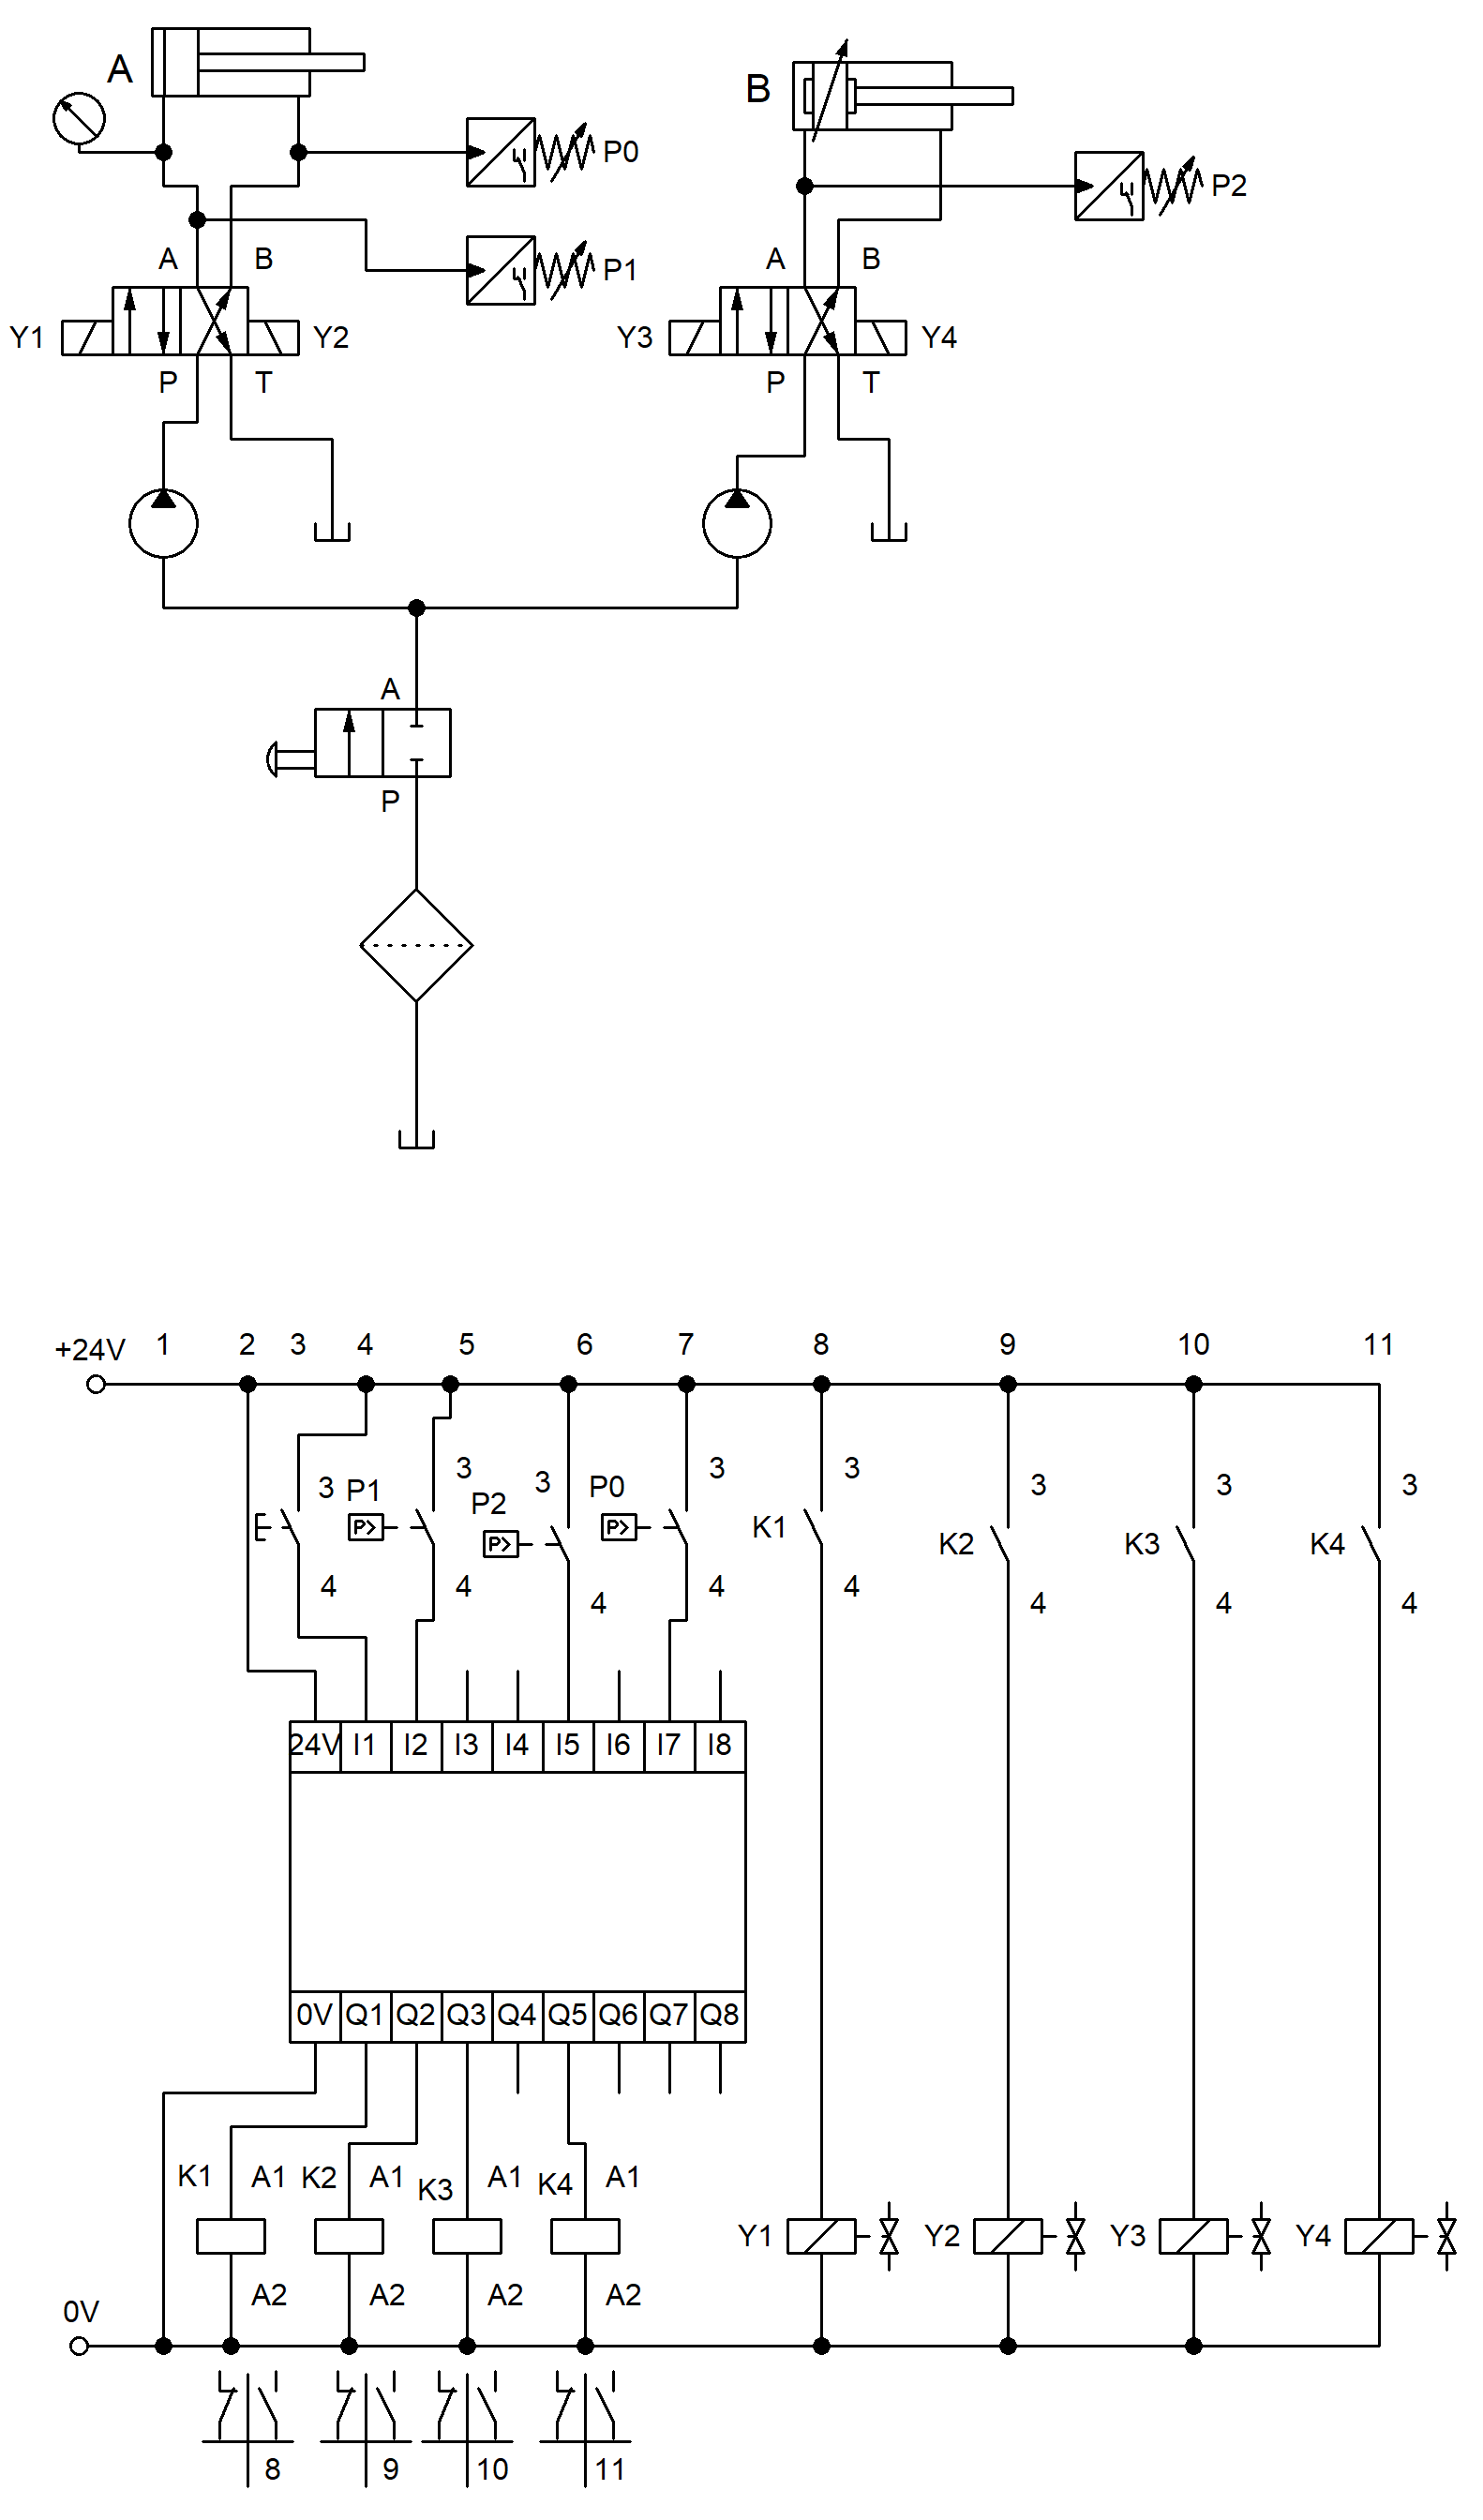

In [43]:
Image('C_Automatizado.png',width=500)

Para automatizar o movimento dos pistões, foi considerada a utilização de um Controlador Lógico Programável (CLP) em conjunto com três pressostatos, posicionados no início e no fim do curso do pistão A, e no início do curso do pistão B. A configuração também inclui uma válvula de 2 vias e 2 posições, responsável por iniciar e encerrar os movimentos do circuito.

A lógica que satisfaz a sequência de comandos preestabelecida **A+B+(A-B-)** baseia-se na seguinte operação: no início do curso o pressostato P0 aciona uma botoeira que fecha um contato para o acionamento da solenóide Y1, fazendo com o que o pistão comece a avançar. Ao atingir o fim do curso, o pressostato P1 é ativado, sinalizando para que a solenóide Y3 seja acionada, o que faz o pistão B avançar. Quando o pistão B atinge o fim do curso, o pressostato P2 é ativado, acionando as solenóides Y2 e Y4 simultaneamente para que ambos os pistões recuem, reiniciando o ciclo.

Este ciclo continua em loop enquanto a válvula de 2 vias e 2 posições estiver ativada.

Abaixo, segue um vídeo da simulação do circuito automatizado no fluidsim.

In [44]:
Video('C_automatizado.m4v',width=700)

## 4.0 Diagrama de estados

Abaixo segue o diagrama de estados para os dois pistões do circuito automatizado com cinco ciclos.

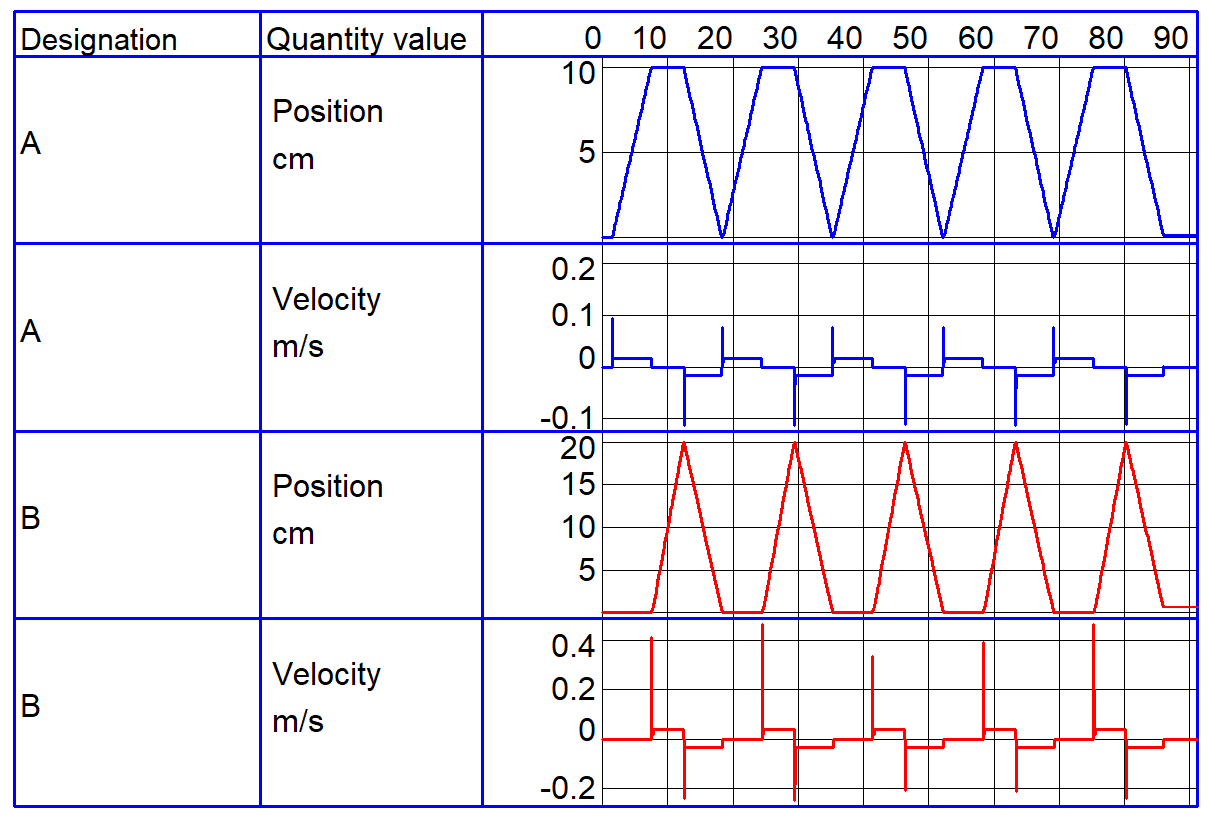

In [45]:
Image('gráfico_estados.png',width=500,height=500)

## 5.0 Referências Bibliográficas

BUSTAMANTE, Arivelto. Automação Hidráulica: Projetos, Dimensionamentos e Análise de Circuitos. [S. l.: s. n.], 2013.

